# Modeling: Nationality of Portugal Visitors  
The aim of this notebook is:  
- To understand where visitors to Portuguese attractions come from.  
- To determine if there is a relationship between holidays in their homeland and their visits.  

The necessary imports are provided below. We are working with the `cleaned_data.csv` file created during the Data Understanding and Data Preparation notebook.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Pre-Modeling Data Preparation

This data is only treated here since we did not want to delete the `Null` rows on `userLocation` column. For other modeling parts it may have meaningful information.

### Initial Code  
We started by analyzing the `cleaned_data` file (created in the Data Understanding and Data Preparation notebook).  
- For users from the USA, the `userLocation` column contained data in the format: `"city, state"`.  
- For other countries, it was formatted as: `"city, country"`.  

We began by splitting the data by `","` and focused on the country part (the text after the comma). We also removed any spaces between the comma and the text, converting all values to uppercase.  

If the field did not contain a comma, the entire `userLocation` was treated as a country.  

For the USA, we created two lists:  
1. **State Codes**  
2. **Full State Names**  

We continued by printing the unique countries (a list of non-repeated countries). Apart from the USA, we noticed that some countries were written in different formats.  
- To address this, we created lists for such cases and checked if the country name was inside a value.  
- For example, for the user location `"BC CANADA"`, we searched for `"CANADA"` within the value and attributed `"CANADA"`.  

We continue the process through trial and error until we had sufficient filters. All this data processing was added to a new column named `country`. 

In [12]:
""" 
import pandas as pd
us_states = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]

us_state_names = [
    "ALABAMA", "ALASKA", "ARIZONA", "ARKANSAS", "CALIFORNIA", "COLORADO", "CONNECTICUT", "DELAWARE", "FLORIDA", "GEORGIA", 
    "HAWAII", "IDAHO", "ILLINOIS", "INDIANA", "IOWA", "KANSAS", "KENTUCKY", "LOUISIANA", "MAINE", "MARYLAND", 
    "MASSACHUSETTS", "MICHIGAN", "MINNESOTA", "MISSISSIPPI", "MISSOURI", "MONTANA", "NEBRASKA", "NEVADA", "NEW HAMPSHIRE", "NEW JERSEY", 
    "NEW MEXICO", "NEW YORK", "NORTH CAROLINA", "NORTH DAKOTA", "OHIO", "OKLAHOMA", "OREGON", "PENNSYLVANIA", "RHODE ISLAND", "SOUTH CAROLINA", 
    "SOUTH DAKOTA", "TENNESSEE", "TEXAS", "UTAH", "VERMONT", "VIRGINIA", "WASHINGTON", "WEST VIRGINIA", "WISCONSIN", "WYOMING", "UNITED STATES", "UNITED STATES OF AMERICA"
]
uk_countries = ["ENGLAND", "SCOTLAND", "WALES", "NORTHERN IRELAND"]

df = pd.read_csv('cleaned_data.csv', delimiter=";")

df['country'] = df['userLocation'].str.split(',').str[1].str.strip().str.upper()

df = df.dropna(subset=['country'])

df['country'] = df['country'].apply(lambda x: 'USA' if x in us_states else x)
df['country'] = df['country'].apply(lambda x: 'USA' if x in us_state_names else x)
df['country'] = df['country'].apply(lambda x: 'UK' if x in uk_countries else x)
df['country'] = df['country'].apply(lambda x: 'USA' if 'USA' in x else x)
df['country'] = df['country'].apply(lambda x: 'CANADA' if 'CANADA' in x else x)
df['country'] = df['country'].apply(lambda x: 'AUSTRALIA' if 'AUSTRALIA' in x else x)

unique_countries = df['country'].unique()

print("Unique countries:")
print(unique_countries)

num_unique_countries = len(unique_countries)
print(f"\nNumber of unique countries: {num_unique_countries}") """

' \nimport pandas as pd\nus_states = [\n    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", \n    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", \n    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", \n    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", \n    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"\n]\n\nus_state_names = [\n    "ALABAMA", "ALASKA", "ARIZONA", "ARKANSAS", "CALIFORNIA", "COLORADO", "CONNECTICUT", "DELAWARE", "FLORIDA", "GEORGIA", \n    "HAWAII", "IDAHO", "ILLINOIS", "INDIANA", "IOWA", "KANSAS", "KENTUCKY", "LOUISIANA", "MAINE", "MARYLAND", \n    "MASSACHUSETTS", "MICHIGAN", "MINNESOTA", "MISSISSIPPI", "MISSOURI", "MONTANA", "NEBRASKA", "NEVADA", "NEW HAMPSHIRE", "NEW JERSEY", \n    "NEW MEXICO", "NEW YORK", "NORTH CAROLINA", "NORTH DAKOTA", "OHIO", "OKLAHOMA", "OREGON", "PENNSYLVANIA", "RHODE ISLAND", "SOUTH CAROLINA", \n    "SOUTH DAKOTA", "TENNESSEE", "TEXAS", "UTAH", "VERMONT", "VIRGINIA", "WASHINGTON"

### Top 10 Countries with the Most Reviews  
We identified the top 10 countries contributing the most reviews, along with the number of reviews for each.  

For the process, we introduced a `country_mapping` and a `normalize_country` function.  
- The mapping included countries with different spellings or formats.  
- The normalization function was implemented to make the code more efficient, as it was starting to look "messy." We asked ChatGPT to help optimize the code (PROMPT: "Here is this code ..., write it efficiently way and less confusing").  

In [13]:
def normalize_country(location):
    us_states = set(["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
                     "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
                     "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
                     "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
                     "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "DC"])
    
    us_state_names = set(["ALABAMA", "ALASKA", "ARIZONA", "ARKANSAS", "CALIFORNIA", "COLORADO", "CONNECTICUT", "DELAWARE", 
                          "FLORIDA", "GEORGIA", "HAWAII", "IDAHO", "ILLINOIS", "INDIANA", "IOWA", "KANSAS", "KENTUCKY", 
                          "LOUISIANA", "MAINE", "MARYLAND", "MASSACHUSETTS", "MICHIGAN", "MINNESOTA", "MISSISSIPPI", 
                          "MISSOURI", "MONTANA", "NEBRASKA", "NEVADA", "NEW HAMPSHIRE", "NEW JERSEY", "NEW MEXICO", 
                          "NEW YORK", "NORTH CAROLINA", "NORTH DAKOTA", "OHIO", "OKLAHOMA", "OREGON", "PENNSYLVANIA", 
                          "RHODE ISLAND", "SOUTH CAROLINA", "SOUTH DAKOTA", "TENNESSEE", "TEXAS", "UTAH", "VERMONT", 
                          "VIRGINIA", "WASHINGTON", "WEST VIRGINIA", "WISCONSIN", "WYOMING", "UNITED STATES", 
                          "UNITED STATES OF AMERICA"])
    
    uk_countries = set(["ENGLAND", "SCOTLAND", "WALES", "NORTHERN IRELAND"])
    
    country_mapping = {
        "CAN": "CANADA", "CND": "CANADA", "AU": "AUSTRALIA", "AUS": "AUSTRALIA",
        "DE": "GERMANY", "GER": "GERMANY", "FR": "FRANCE", "FRA": "FRANCE",
        "IT": "ITALY", "ITA": "ITALY", "ES": "SPAIN", "ESP": "SPAIN",
        "MX": "MEXICO", "MEX": "MEXICO", "CN": "CHINA", "CHINESE": "CHINA",
        "IN": "INDIA", "BHARAT": "INDIA", "RU": "RUSSIA", "RUS": "RUSSIA",
        "KR": "SOUTH KOREA", "KOR": "SOUTH KOREA", "JP": "JAPAN", "JPN": "JAPAN",
        "BR": "BRAZIL", "BRA": "BRAZIL", "BRASIL": "BRAZIL", 
        "AE": "UNITED ARAB EMIRATES", "UAE": "UNITED ARAB EMIRATES", 
        "ZA": "SOUTH AFRICA", "RSA": "SOUTH AFRICA"
    }
    
    substring_mapping = {
        "USA": "USA", "CANADA": "CANADA", "AUSTRALIA": "AUSTRALIA",
        "UNITED KINGDOM": "UK", "ENGLAND": "UK", "SCOTLAND": "UK",
        "WALES": "UK", "NORTHERN IRELAND": "UK"
    }

    brazilian_states = {"RN", "RJ", "SP", "RS", "CE", "PR", "MG", "PE", "DF", "GO", "AM"}
    canadian_provinces = {"BC", "NB", "ON", "MB", "NL"}

    if pd.isna(location) or location.strip().upper() == "NULL":
        return None
    
    parts = [p.strip().upper() for p in location.split(',')]
    country = parts[1] if len(parts) > 1 else parts[0]

    if country in country_mapping:
        return country_mapping[country]
    
    if country == "UK" or country in uk_countries:
        return "UK"

    if country in us_states or country in us_state_names:
        return "USA"
    
    for substring, mapped_country in substring_mapping.items():
        if substring in country:
            return mapped_country

    if country in brazilian_states:
        return "BRAZIL"

    if country in canadian_provinces:
        return "CANADA"

    return country

df = pd.read_csv('cleaned_data.csv', delimiter=";")

df['country'] = df['userLocation'].apply(normalize_country)

df.dropna(subset=['country'], inplace=True)

country_counts = df['country'].value_counts()

top_10_countries = country_counts.head(10)
print("\nTop 10 countries that review the most:")
print(top_10_countries)



Top 10 countries that review the most:
country
USA                8259
UK                 7887
AUSTRALIA          1539
CANADA             1378
SPAIN               735
INDIA               382
IRELAND             380
FRANCE              365
ITALY               361
THE NETHERLANDS     356
Name: count, dtype: int64


### Portuguese Attractions Analysis  
We repeated the process but focused only on Portuguese attractions. This helped us identify the top 10 countries reviewing Portuguese attractions and the corresponding review counts.  

In [14]:
local_ids = ["MAG010", "MAG014", "MAG021", "MAG032", "MAG047", "MAG049", "MAG093"]
df_portugal_reviews = df[df['localID'].isin(local_ids)]

country_counts = df_portugal_reviews['country'].value_counts()

top_10_countries_pt = country_counts.head(10)

print("Top 10 countries that review Portugal:")
print(top_10_countries_pt)

Top 10 countries that review Portugal:
country
USA                980
UK                 897
CANADA             269
PORTUGAL           188
AUSTRALIA          163
IRELAND             91
THE NETHERLANDS     72
GERMANY             58
SPAIN               56
ITALY               50
Name: count, dtype: int64


### Spanish Attractions Analysis  
We repeated the process but focused only on Spanish attractions. This helped us identify the top 10 countries reviewing Portuguese attractions and the corresponding review counts.  

In [15]:
local_ids = ['MAG001', 'MAG002', 'MAG004', 'MAG008', 'MAG012', 'MAG015', 'MAG019', 'MAG023', 'MAG030', 'MAG052', 'MAG058', 'MAG059', 'MAG081', 'MAG089', 'MAG094', 'MAG097', 'MAG098']
df_spanish_reviews = df[df['localID'].isin(local_ids)]

country_counts = df_spanish_reviews['country'].value_counts()

top_10_countries_es = country_counts.head(10)

print("Top 10 countries that review Spain:")
print(top_10_countries_es)

Top 10 countries that review Spain:
country
USA                4875
UK                 4271
AUSTRALIA           786
CANADA              715
SPAIN               605
INDIA               226
IRELAND             178
GERMANY             163
FRANCE              144
THE NETHERLANDS     143
Name: count, dtype: int64


## Modeling

### Initial Visualization Attempt  
We attempted to create bar plots and line plots for each of the top 10 countries:  
- **Number of Reviews per Month**  
- **Average Rating per Month**  

However, this resulted in too many graphs, making comparisons difficult.  


In [16]:
""" 
#some code is the same as timeline analysis notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['reviewVisited'] = pd.to_datetime(df['reviewVisited'], errors='coerce')

df['year'] = df['reviewVisited'].dt.year
df['month'] = df['reviewVisited'].dt.month

data_filtered = df[df['year'].isin([2017, 2018, 2019, 2020, 2021])]

summary = data_filtered.groupby('year').agg(
    total_reviews=('globalRating', 'count'),
    average_rating=('globalRating', 'mean')
).reset_index()

# Incorporate data from 2017 into 2018
if 2017 in summary['year'].values:
    # Select 2017 data
    row_2017 = summary[summary['year'] == 2017].iloc[0]
    
    # Check if 2018 exists
    if 2018 in summary['year'].values:
        # Combine 2017 with 2018
        idx_2018 = summary[summary['year'] == 2018].index[0]
        summary.loc[idx_2018, 'total_reviews'] += row_2017['total_reviews']
        summary.loc[idx_2018, 'average_rating'] = (
            (summary.loc[idx_2018, 'average_rating'] * summary.loc[idx_2018, 'total_reviews'] +
             row_2017['average_rating'] * row_2017['total_reviews']) /
            (summary.loc[idx_2018, 'total_reviews'] + row_2017['total_reviews'])
        )

    # Remove 2017 data
summary = summary[summary['year'] != 2017]
df = df[df['year'] != 2017]

# Sort the summary by year
summary = summary.sort_values('year').reset_index(drop=True)

# Display the final summary
print("Annual summary:")
print(summary)

top_countries = df['country'].value_counts().head(10).index

sns.set_theme(style="whitegrid", palette="coolwarm", font_scale=1.1)

for country in top_countries:
    country_data = df[df['country'] == country]

    plt.figure(figsize=(12, 7))
    sns.countplot(data=country_data, x="month", hue="year")
    plt.title(f"Number of Reviews per Month for {country} (2018-2021)")
    plt.xlabel("Month")
    plt.ylabel("Number of Reviews")
    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 7))
    sns.lineplot(data=country_data, x="month", y="globalRating", hue="year", estimator='mean', marker="o", errorbar=None)
    plt.title(f"Average Rating per Month for {country} (2018-2021)")
    plt.xlabel("Month")
    plt.ylabel("Average Rating")
    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show() """


' \n#some code is the same as timeline analysis notebook\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\ndf[\'reviewVisited\'] = pd.to_datetime(df[\'reviewVisited\'], errors=\'coerce\')\n\ndf[\'year\'] = df[\'reviewVisited\'].dt.year\ndf[\'month\'] = df[\'reviewVisited\'].dt.month\n\ndata_filtered = df[df[\'year\'].isin([2017, 2018, 2019, 2020, 2021])]\n\nsummary = data_filtered.groupby(\'year\').agg(\n    total_reviews=(\'globalRating\', \'count\'),\n    average_rating=(\'globalRating\', \'mean\')\n).reset_index()\n\n# Incorporate data from 2017 into 2018\nif 2017 in summary[\'year\'].values:\n    # Select 2017 data\n    row_2017 = summary[summary[\'year\'] == 2017].iloc[0]\n    \n    # Check if 2018 exists\n    if 2018 in summary[\'year\'].values:\n        # Combine 2017 with 2018\n        idx_2018 = summary[summary[\'year\'] == 2018].index[0]\n        summary.loc[idx_2018, \'total_reviews\'] += row_2017[\'total_reviews\']\n        summary.loc[idx_2018

### Improved Visualization with Heatmaps  
To improve visualization, we decided to use heatmaps:  
- **Reviews by Top 10 Countries and Year**  
- **Reviews by Top 10 Countries and Month**  

Since 2017 had only one entry, we merged its data into 2018 for simplicity. 

C:\Users\Laura.LAPTOP-IJA5A916\AppData\Local\Temp\ipykernel_11676\1002586110.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdata_top10.loc[sdata_top10['year'] == 2018, 'total_reviews'] = new_reviews_count_2018
C:\Users\Laura.LAPTOP-IJA5A916\AppData\Local\Temp\ipykernel_11676\1002586110.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.578947368421052' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sdata_top10.loc[sdata_top10['year'] == 2018, 'reviewRating'] = new_avg_rating_2018


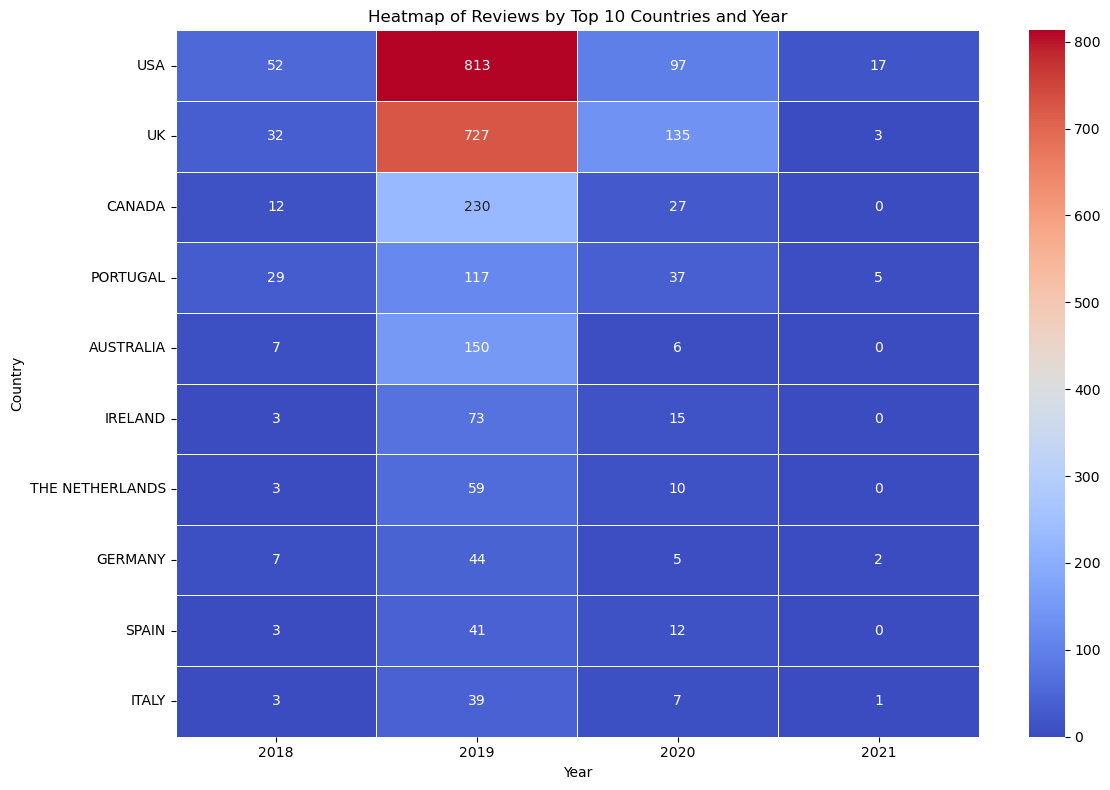

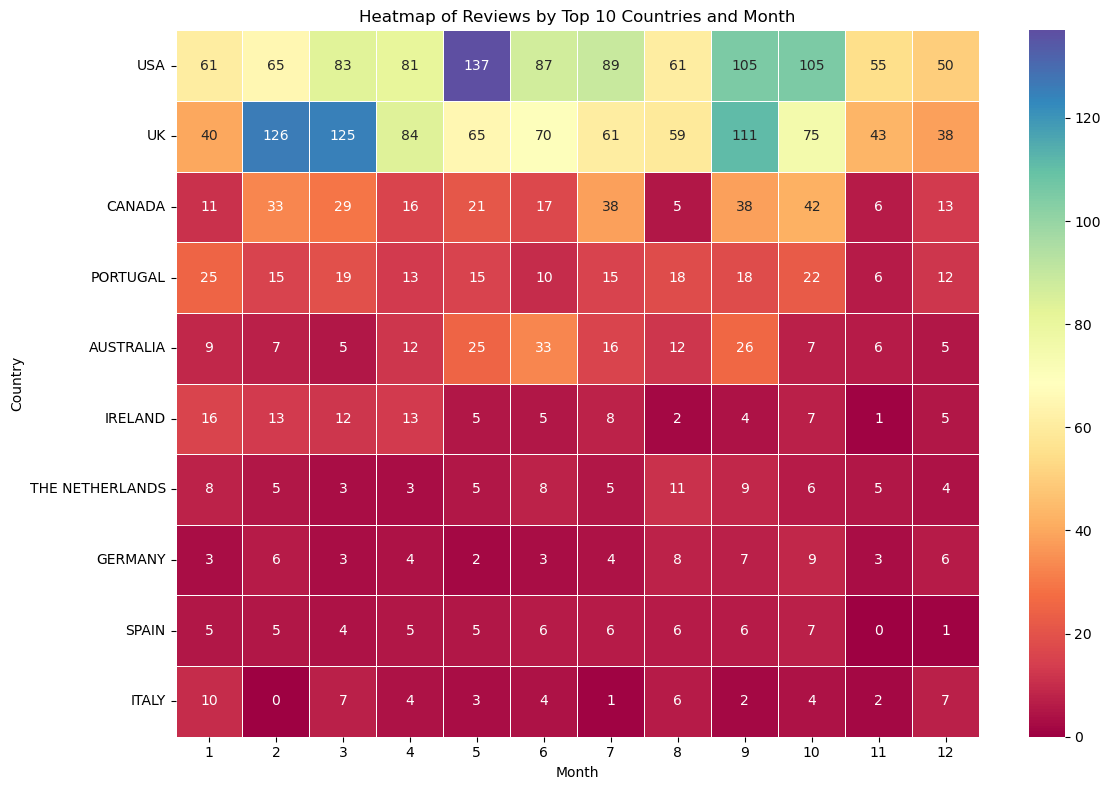

In [17]:

# Convert 'reviewVisited' to datetime and extract year and month
df['reviewVisited'] = pd.to_datetime(df['reviewVisited'], errors='coerce')
df['year'] = df['reviewVisited'].dt.year
df['month'] = df['reviewVisited'].dt.month

# Define local IDs for filtering
local_ids = ["MAG010", "MAG014", "MAG021", "MAG032", "MAG047", "MAG049", "MAG093"]
sdata = df[df['localID'].isin(local_ids)].copy()

# Get top 10 countries for reviews from Portugal
top_10_countries_portugal = sdata['country'].value_counts().head(10).index
sdata_top10 = sdata[sdata['country'].isin(top_10_countries_portugal)]

# Combine 2017 data into 2018
# Select the 2017 data (for reviews count and ratings)
sdata_2017 = sdata_top10[sdata_top10['year'] == 2017]
total_reviews_2017 = sdata_2017.shape[0]  # Assuming each row represents a review
avg_rating_2017 = sdata_2017['reviewRating'].mean()  # Calculate average rating from 'reviewRating'

# Select the 2018 data for the same countries
sdata_2018 = sdata_top10[sdata_top10['year'] == 2018]
total_reviews_2018 = sdata_2018.shape[0]

# Calculate the new average rating for 2018 after merging 2017
avg_rating_2018 = sdata_2018['reviewRating'].mean()

# Combine review count for 2017 into 2018
new_reviews_count_2018 = total_reviews_2018 + total_reviews_2017
new_avg_rating_2018 = (
    (avg_rating_2018 * total_reviews_2018 + avg_rating_2017 * total_reviews_2017) / 
    new_reviews_count_2018
)

sdata_top10.loc[sdata_top10['year'] == 2018, 'total_reviews'] = new_reviews_count_2018
sdata_top10.loc[sdata_top10['year'] == 2018, 'reviewRating'] = new_avg_rating_2018

sdata_top10 = sdata_top10[sdata_top10['year'] != 2017]

cross_table_year = pd.crosstab(sdata_top10['country'], sdata_top10['year']).loc[top_10_countries_portugal]
cross_table_month = pd.crosstab(sdata_top10['country'], sdata_top10['month']).loc[top_10_countries_portugal]

plt.figure(figsize=(12, 8))
sns.heatmap(cross_table_year, annot=True, fmt="d", cmap="coolwarm", linewidths=.5)
plt.title("Heatmap of Reviews by Top 10 Countries and Year")
plt.ylabel("Country")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(cross_table_month, annot=True, fmt="d", cmap="Spectral", linewidths=.5)
plt.title("Heatmap of Reviews by Top 10 Countries and Month")
plt.ylabel("Country")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

We also created:  
- **Heatmap of Average Rating by Top 10 Countries and Year**  
- **Heatmap of Average Rating by Top 10 Countries and Month**  

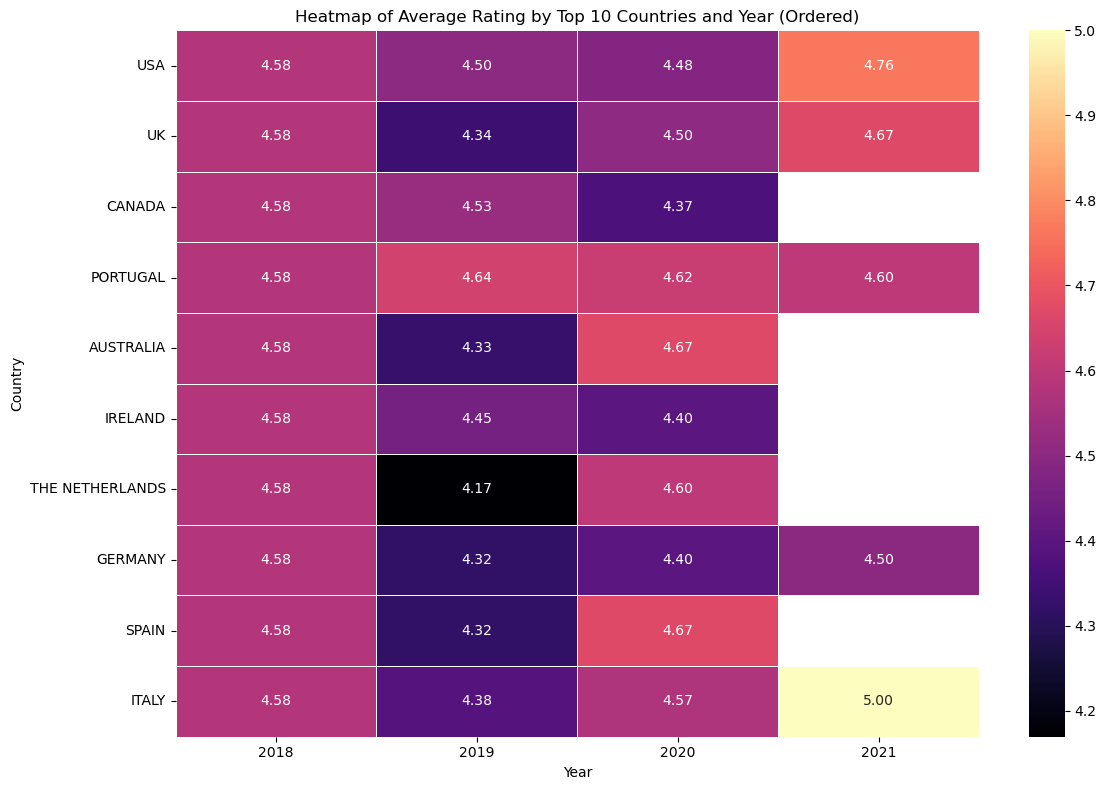

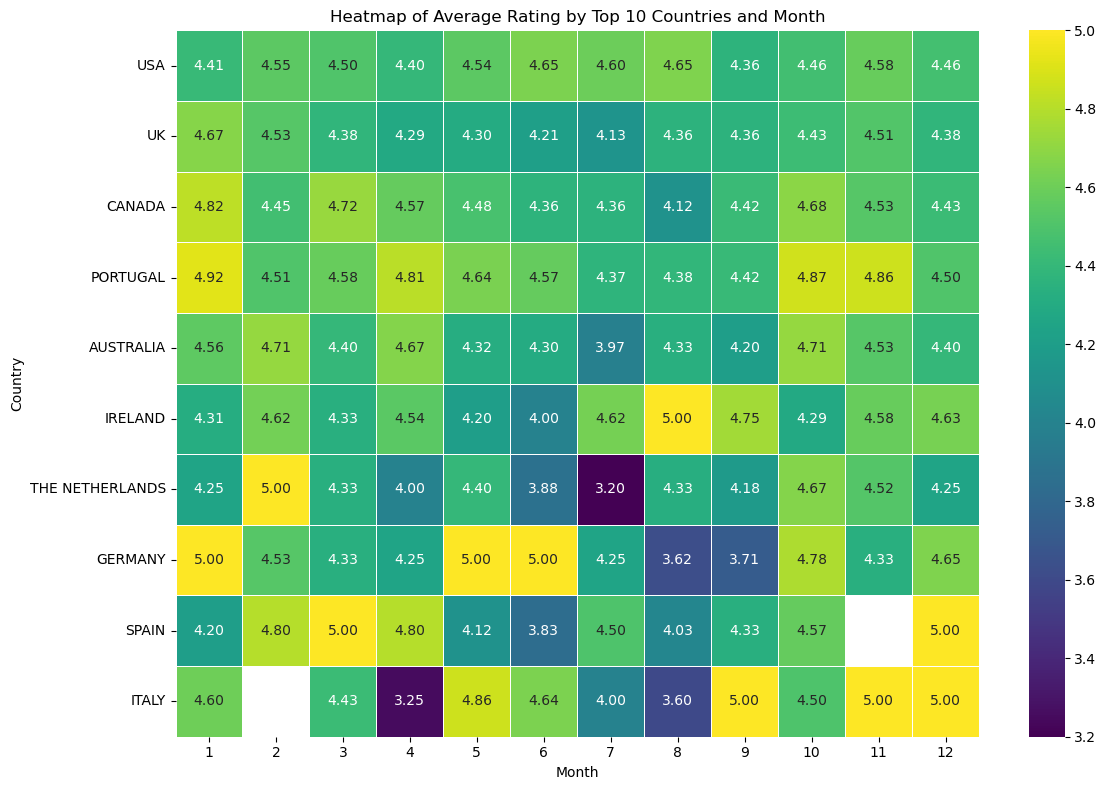

In [18]:
avg_rating_year = pd.crosstab(sdata_top10['country'], sdata_top10['year'], values=sdata_top10['reviewRating'], aggfunc='mean').loc[top_10_countries_portugal]

plt.figure(figsize=(12, 8))
sns.heatmap(avg_rating_year, annot=True, fmt=".2f", cmap="magma", linewidths=.5)
plt.title("Heatmap of Average Rating by Top 10 Countries and Year (Ordered)")
plt.ylabel("Country")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

avg_rating_month = pd.crosstab(sdata_top10['country'], sdata_top10['month'], values=sdata_top10['reviewRating'], aggfunc='mean').loc[top_10_countries_portugal]

plt.figure(figsize=(12, 8))
sns.heatmap(avg_rating_month, annot=True, fmt=".2f", cmap="viridis", linewidths=.5)
plt.title("Heatmap of Average Rating by Top 10 Countries and Month")
plt.ylabel("Country")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

### Holiday Analysis  
For this part, we selected three months with the most reviews for each country.  
- In cases of ties, proximity to other months was the deciding criteria.  
- Using the holiday file, we searched for holidays in those months.  
(PROMPT: we have this code... write a loop that that for each country searches the holidays in that month:
USA 5,9,10
UK 2, 3, 9
CANADA 7,9,10
PORTUGAL 1,3,10
AUSTRALIA 5,6,9
IRELAND 1,2,4
THE NETHERLANDS 6, 8, 9
GERMANY 8,9,10
SPAIN 8,9,10
ITALY 1,3,12).

In [19]:

input_file = "Holidays.csv" 
data = pd.read_csv(input_file, delimiter=";")

data['date'] = pd.to_datetime(data['date'], errors='coerce')

country_months = {
    "United States": [5, 9, 10],
    "United Kingdom": [2, 3, 9],
    "Canada": [7, 9, 10],
    "Portugal": [1, 3, 10],
    "Australia": [5, 6, 9],
    "Ireland": [1, 2, 4],
    "Netherlands": [6, 8, 9], #on the holidays file it does not have "The" before 
    "Germany": [8, 9, 10],
    "Spain": [8, 9, 10],
    "Italy": [1, 3, 12],
}

filtered_results = []


for country, months in country_months.items():
    
    country_data = data[data['countryOrRegion'] == country].copy()
    
    country_data.loc[:, 'month'] = country_data['date'].dt.month
    
    country_filtered_data = country_data[country_data['month'].isin(months)]
    
    unique_holidays = country_filtered_data.drop_duplicates(subset=['countryOrRegion', 'holidayName'], keep='first')
    
    filtered_results.append(unique_holidays)

final_filtered_data = pd.concat(filtered_results, ignore_index=True)

print("\nFiltered Data by Country and Specified Months without Duplicate Holiday Names:")
print(final_filtered_data[['countryOrRegion', 'holidayName', 'month']])



Filtered Data by Country and Specified Months without Duplicate Holiday Names:
   countryOrRegion                                       holidayName  month
0    United States                                      Memorial Day      5
1    United States                                         Labor Day      9
2    United States                                      Columbus Day     10
3    United States                                      Veterans Day     10
4   United Kingdom              St. Patrick's Day [Northern Ireland]      3
5   United Kingdom                                       Good Friday      3
6   United Kingdom  Easter Monday [England, Wales, Northern Ireland]      3
7   United Kingdom   St. Patrick's Day [Northern Ireland] (Observed)      3
8           Canada                                      Dominion Day      7
9           Canada                                        Labour Day      9
10          Canada                                      Thanksgiving     10
11      

Our discussion is on our report.